<a href="https://colab.research.google.com/github/YoonJae-Cho/MLDL_study/blob/main/4_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<4-1 로지스틱 회귀>#

###1. 럭키백의 확률###

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))  # 특정 열에서 고유한 값 추출 = unique() 함수

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# Species 열 빼고 나머지 5개 열 선택
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width' ]].to_numpy() 

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# target 데이터 만들기
fish_target = fish['Species'].to_numpy()

In [ ]:
# 데이터를 훈련 세트와 데이터 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
# 훈련 세트와 테스트 세트를 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

> **k-최근접 이웃 분류기의 확률 예측**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


> 다중 분류 : 타킷 데이터에 2개 이상의 클래스가 포함된 문제

In [ ]:
# 정렬된 타깃값 순서 확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))  # 소숫점 네 번째 자리까지 표기. 다섯 번째 자리에서 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


###2. 로지스틱 회귀###
> 이름은 회귀이지만 분류 모델

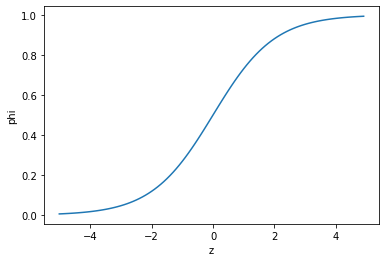

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+ np.exp(-z))  # 지수 함수 계산은 np.exp()
plt.plot(z, phi)


plt.xlabel('z')
plt.ylabel('phi')
plt.show()

> **01. 로지스틱 회귀로 이진 분류 수행하기** : 간단한 이진 분류부터 수행



> 불리언 인덱싱 : 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있음

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# Bream인 행을 골라내려면, train_target == 'Bream'
# 이 비교식은 train_target 배열에서 'Bream'인 것은 True 이고 그 외는 모두 Falses인 배열을 반환
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')  # Bream과 Smelt만 True 나머지는 False
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# 처음 5개 샘플의 예측 확률
print(lr.predict_proba(train_bream_smelt[:5]))  # 예측 확률은 predict_proba

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)  # 어떤 것이 양성 클래스인지 확인 -> Smelt가 양성 클래스 

['Bream' 'Smelt']


In [ ]:
# 선형 회귀에서처럼 로지스틱 회귀가 학습 한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])   # decision_function() 메서드로 z값 출력 가능 / train_bream_smelt의 처음 5개 샘플의 z값 출력
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# decisions 배열의 값을 확률로 변환  --> 사이파이 라이브러리 시그모이드 함수 사용 expit()
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


> **02. 로지스틱 회귀로 다중 분류 수행하기** : 7개의 생선을 분류 (이진 분류는 열이 7개, 얘는 열이 7개겠쥬?)

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)  # max_iter 반복 회수 지정  # 규제 제어 매개변수 C --> alpha와 반대로 작을수록 규제가 커짐, 기본값은 1
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target)) # 둘다 정확도 높고, 과대적합, 과소적합 아님
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))  # 처음 5개 샘플에 대한 예측 출력

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])  # 처음 5개 샘플에 대한 예측 '확률' 출력
print(np.round(proba, decimals=3))  # 출력 간소화하기 위해 소수점 네 번째 자리에서 반올림

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_) # 클래스 정보 확인

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)  

(7, 5) (7,)


> 다중 분류는 클래스마다 z 값을 하나씩 계산

> 다중 분류는 **소프트맥스 함수**(정규화된 지수 함수)를 사용하여 z값을 확률로 변환 (이진 분류는 시그모이드 함수 사용)

In [ ]:
# 테스트 세트의 처음 5개 샘플에 대한 z1~z7의 값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# 사이파이 소프트맥스 함수 
from scipy.special import softmax
proba = softmax(decision, axis = 1)  # axis = 1로 지정하여 각 행, 즉 각 샘플에 대한 소프트맥스 계산
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


#<4-2 확률적 경사 하강법>#

###1. 점진적인 학습###
> **점진적 학습(온라인 학습)** : 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법 --> 데이터를 조금씩 사용해 점진적으로 학습하는 방법 

> 대표적인 점진적 학습 알고리즘으로 **확률적 경사 하강법**이 있음  --> 빅데이터를 학습하는데 핵심적인 역할을 함

> **01. 확률적 경사 하강법** : 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금씩 내려감 (신경망 알고리즘은 확률적 경사 하강법을 꼭 사용함)

> 에포크 : 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정

> 미니배치 경사 하강법 : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식

> 배치 경사 하강법 : 전체 샘플을 사용하는 방식


> **02. 손실 함수** : 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준. 값이 작을수록 좋음

> 비용 함수는 손실 함수의 다른 말이다. 손실 함수는 샘플 하나에 대한 손실을 정의하고 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말한다.

> **03. 로지스틱 손실 함수 (이진 크로스엔트로피 손실 함수)** 

다중 분류에서 사용하는 손실 함수를 크로스엔트로피 손실 함수라고 부름

###2. SGDClassifier###

In [1]:
# 판다스 데이터프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [4]:
# Species 열을 제외한 나머지 5개를 입력 데이터로 사용 
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
# 사이킷런의 train_test_split() 함수를 사용해 훈련 세트/ 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [6]:
# 훈련 세트와 테스트 세트의 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
# 특성값의 스케일을 맞춘 train_scaled와 test_scaled 두 넘파이 배열이 준비 됨

In [7]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 = SGDClassifier
from sklearn.linear_model import SGDClassifier

In [8]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)  
# loss는 손실 함수의 종류를 지정 여기서는 로지스틱 손실 함수 지정/ max_iter는 수행할 에포크 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [9]:
# 모델을 이어서 훈련할 때는 partial_fit() 메서드 사용 --> fit() 메서드와 사용법이 같지만 1 에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 정확도가 향상하긴 했으나 얼만큼 더 훈련해야 할까? --> 기준 필요

0.8151260504201681
0.85


###3. 에포크와 과대/과소적합###

> 조기 종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것

In [13]:
  # fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용
  # partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit()에 전달해 주어야 함
  # 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만듦
  # 또, 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비
  import numpy as np
  sc = SGDClassifier(loss='log', random_state=42)
  train_score = []
  test_score = []
  classes = np.unique(train_target)

In [14]:
# 에포크를 300번 반복
# 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

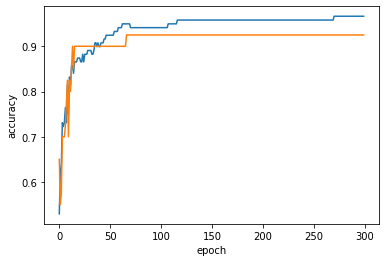

In [15]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 나타냄
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 100번째 에포크가 적절한 반복 횟수로 보임

In [17]:
# SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state = 42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# tol 매개변수에서 향상될 최솟값을 지정 
# 앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter = 100만큼 무조건 반복하도록 함

0.957983193277311
0.925


> SGDClassifier의 loss 매개변수 : 기본값은 'hinge'

> 힌지 손실(서포트 벡터 머신) : 또 다른 머신러닝 알고리즘을 위한 손실 함수

In [18]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target ))

0.9495798319327731
0.925
